In [1]:
import sys
sys.path.append("..")  # Adjusts the path to include the parent directory

from rps_simulation.rps_base import RPS_Basic, RPS_Basic_Multirun  # Importing RPS_Basic class from rps_base.py
from rps_simulation.learning_curves import exponential_learning, logistic_learning  # Learning Curves
from rps_simulation.forgetting_curves import exponential_forgetting, spacing_effect # Forgetting Curves, Spacing Effect
from rps_simulation.practice_rate import simple_linear_rate  # Practice-Rate Function
from rps_simulation.waiting_times import exponential_waiting_time  # Waiting-Time Distribution
#from rps_simulation.dynamical_models import logistic_model, general_model # Dynamical Model
#from rps_simulation.sensitivity_analysis import RPS_sensitivity # sensitivity analysis


import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
#import sympy as sp
import matplotlib.pyplot as plt
import seaborn as sns

# Colour codes for concave and sigmoid curves:
concave_colour = '#466be8'
sigmoid_colour = '#f77150'

np.random.seed(10)

## 1. Concave (Exp) Learning Curve

In [2]:
# Hyperparameters - spacing effect
ϵ = 2
s_spacing = 0.5 
beta_min = 0

n_iti = 101 # number of different values of waiting times
n_ret_int = 4 # number of retention interval

# Independent variables:
iti = np.linspace(0,5, n_iti) # inter-trial interval/ waiting time
#ret_int = np.linspace(5, 10, n_ret_int) # retention intervals
ret_int = [5, 10, 15, 20] # retention intervals

# initial conditions;
beta0 = 0.05 # starting forgetting rate
s0 = 0.8 # starting skill

# learning conditions:
exp_update = exponential_learning(alpha=0.002, skill_max=1)

# Data arrays be filled after calculations:
beta1 = np.zeros((n_ret_int, n_iti)) # beta after first trial:
beta2 = np.zeros((n_ret_int, n_iti)) # final beta
s1 = np.zeros((n_ret_int, n_iti))
s2 = np.zeros((n_ret_int, n_iti))

## Run Simulations and fill arrays:
for i in range(n_ret_int): # loop over all retention intervals
    for j in range(n_iti): # loop over all inter-trial intervals
        s1_bef = exponential_forgetting(forgetting_rate=beta0).calculate(s0, iti[j]) # skill just before trial 1
        s1_tmp = exp_update.updated_skill(s1_bef) # skill after trial 1
        s1[i,j] = s1_tmp
    
        # calculate forgetting rate after trial 1:
        β1 = spacing_effect(beta_min=0.01, beta_max=beta0, e=ϵ, s=s_spacing).calc_forgetting_rate([iti[j]])
        beta1[i,j]=β1
    
        # Calculate final skill:
        s2_bef = exponential_forgetting(forgetting_rate=β1).calculate(s1_tmp, ret_int[i])
        s2_tmp = exp_update.updated_skill(s2_bef) # final skill after retention interval
        s2[i,j] = s2_tmp
    
        # calculate final forgetting:
        Δt_list = [iti[j], ret_int[i]] # list of wait times
        β2 = spacing_effect(beta_min=0.01, beta_max=β1, e=ϵ, s=s_spacing).calc_forgetting_rate(Δt_list)
        beta2[i,j]=β1
    
    

## Plotting:

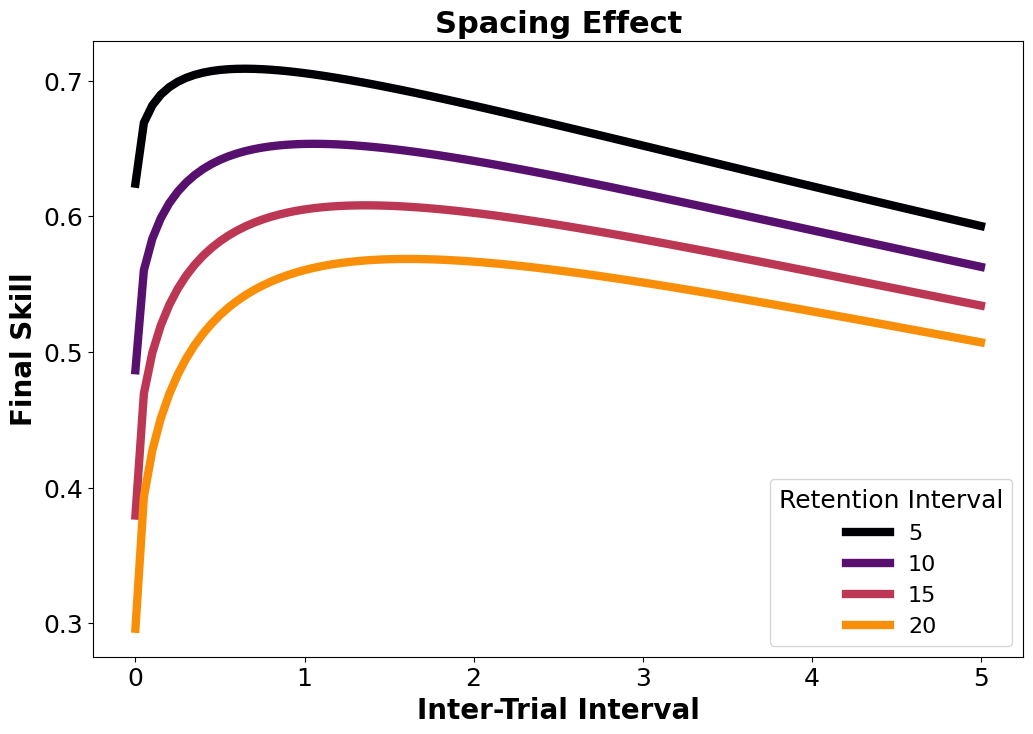

In [3]:
# Create a colormap
cm = plt.get_cmap('inferno')  # Can choose other colormaps like 'plasma', 'inferno', 'magma', 'cividis'

plt.figure(figsize=(12,8))
for i in range(n_ret_int): # looping over different retention intervals
    #plt.plot(iti, s2[i,:], lw=6, color='Black')
    plt.plot(iti, s2[i, :], lw=6, color=cm(i / n_ret_int), label = str(ret_int[i]))
plt.title('Spacing Effect', fontsize=22, weight='heavy')
plt.xlabel('Inter-Trial Interval', fontsize=20, weight='heavy')
plt.ylabel('Final Skill', fontsize=20, weight='heavy')

# Adding a legend with a title
plt.legend(title='Retention Interval', fontsize=16, title_fontsize=18)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.savefig('../plots/spacing_effect_RT.png', dpi=512)
plt.show()

# Sample Sim Incorporating Spacing:

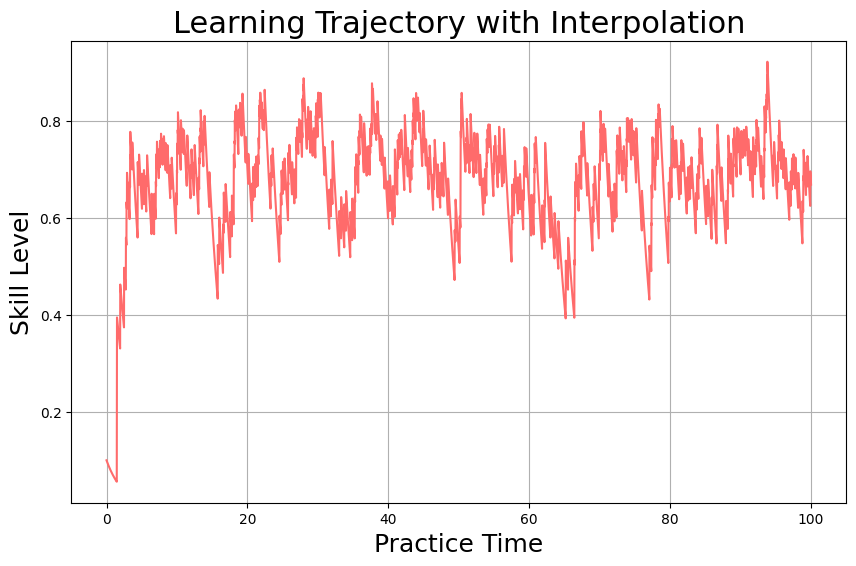

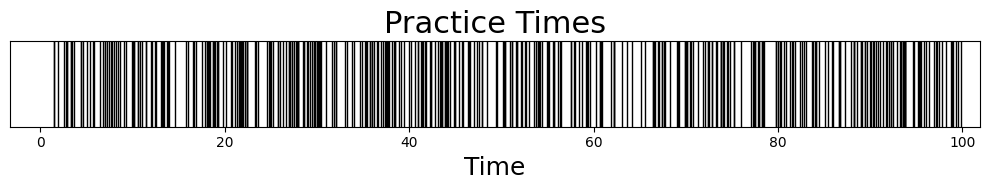

In [4]:
## Defining the learning, forgetting and practice functions:
exp_learning = exponential_learning(alpha=0.2) # alpha is the learning rate
simple_prac_func = simple_linear_rate(a=0.2, b=5) # sample practice function
exp_forgetting = exponential_forgetting(forgetting_rate=0.4) # setting forgetting function to exponential 
spacing = spacing_effect(beta_min=0.2, e=0.01, s=0.5)

# Initializing the RPS_Basic class:
sample_concave = RPS_Basic(learning_func = exp_learning,
                    forgetting_func = exp_forgetting,
                    practice_rate_func = simple_prac_func,
                    waiting_time_dist = exponential_waiting_time,
                    spacing_func = spacing,
                    initial_skill=0.1, initial_practice_rate=1, max_time=100)


# run simulation:
sample_concave.run_simulation()

# simple learning trajectory with markers for practice events:
#sample_concave.plot_simple_trajectory()

# plot trajectory
sample_concave.plot_learning_trajectory()

# Can also generate timestamp plots of when practice_events occured:
sample_concave.practice_times_plot()

In [5]:
# Get data form the simulation run and collect it in a dictionary
sample_data = sample_concave.data()

ss = sample_data['skill_levels']
pts = sample_data['practice_times']
tls = sample_data['time_lags']
frs = sample_data['forgetting_rates']

print(len(ss), len(pts), len(tls), len(frs))
print(sample_data['total_practice_events'])

418 418 415 416
416


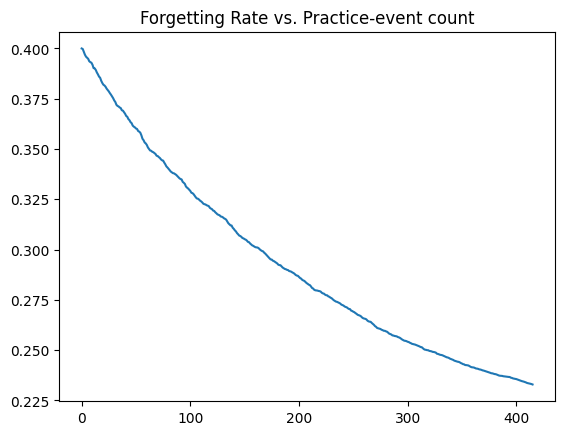

In [7]:
plt.plot(frs)
plt.title('Forgetting Rate vs. Practice-event count')
plt.show()

# 2. Concave and Sigmoid Sims with Spacing:

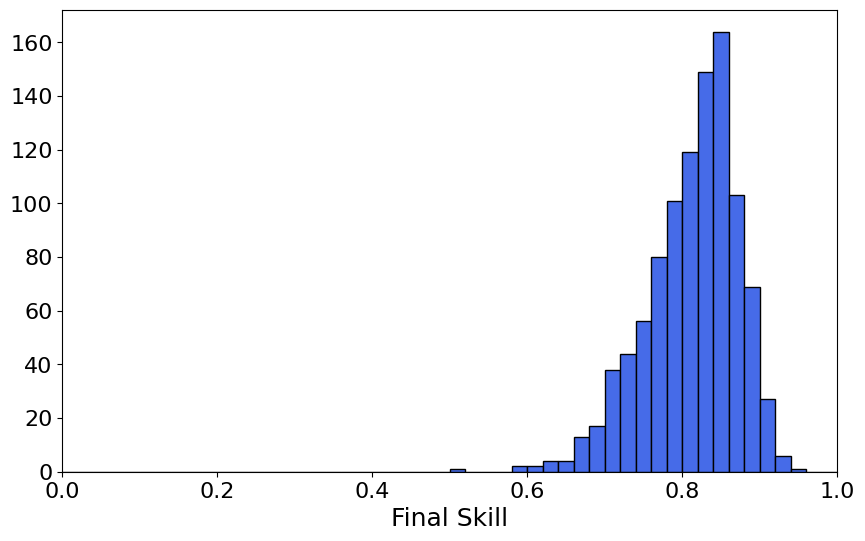

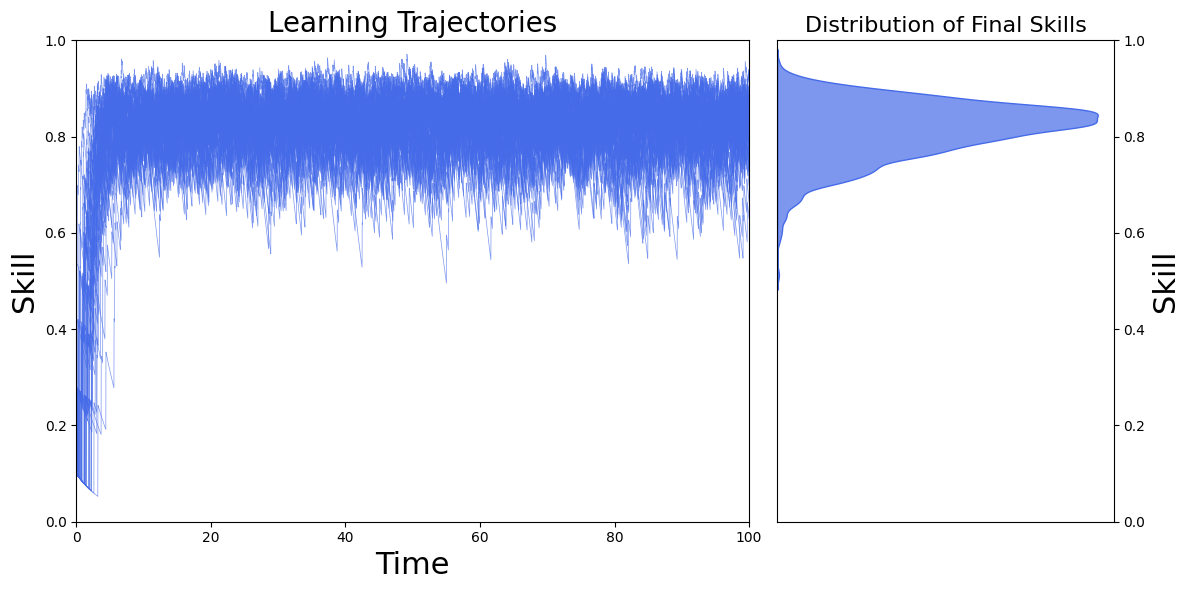

In [12]:
########## Concave Simulation and Plots ##########

## Defining the learning, forgetting and practice functions:
exp_learning = exponential_learning(alpha=0.2) # alpha is the learning rate
simple_prac_func = simple_linear_rate(a=0.2, b=5) # sample practice function
exp_forgetting = exponential_forgetting(forgetting_rate=0.2) # setting forgetting function to exponential 
spacing = spacing_effect(beta_min=0.1, e=0.01, s=0.5)


# initializing the class
concave_spacing_sims = RPS_Basic_Multirun(learning_func=exp_learning,
                            forgetting_func=exp_forgetting,
                            practice_rate_func=simple_prac_func,
                            waiting_time_dist=exponential_waiting_time,
                            spacing_func = spacing,
                            initial_skill = 0.1, 
                            initial_practice_rate = 1, 
                            max_time = 100,
                            n_sims=1000)
# running the simulations
concave_spacing_sims.run_multiple_sims() 

#concave_colour = '#466be8'

# plot final skill histogram:
concave_spacing_sims.plot_final_skill_histogram(colour=concave_colour)
 
# combined_plot of learning trajectories + histogram of final skills
#concave_sims.plot_trajectory_and_histogram(colour_lineplots=concave_colour, colour_histogram=concave_colour, n_plots=100)

# Better Plot:
# concave_spacing_sims.plot_summary_cogsci(colour_lineplots=concave_colour, colour_histogram=concave_colour, n_plots=50, 
#    bw_adjust=0.7,save_location='../plots/concave_spacing_sim_summ_cogsci.png')

concave_spacing_sims.plot_summary_cogsci(colour_lineplots=concave_colour, colour_histogram=concave_colour, n_plots=50, bw_adjust=0.7)


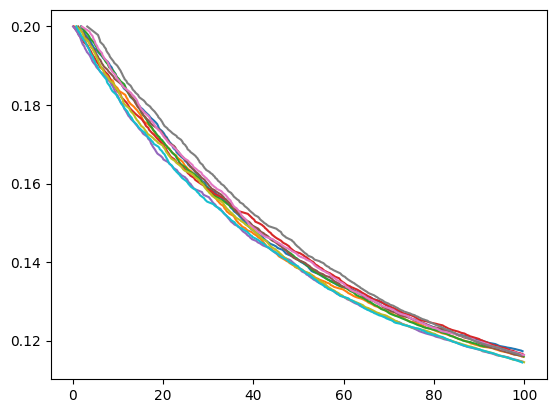

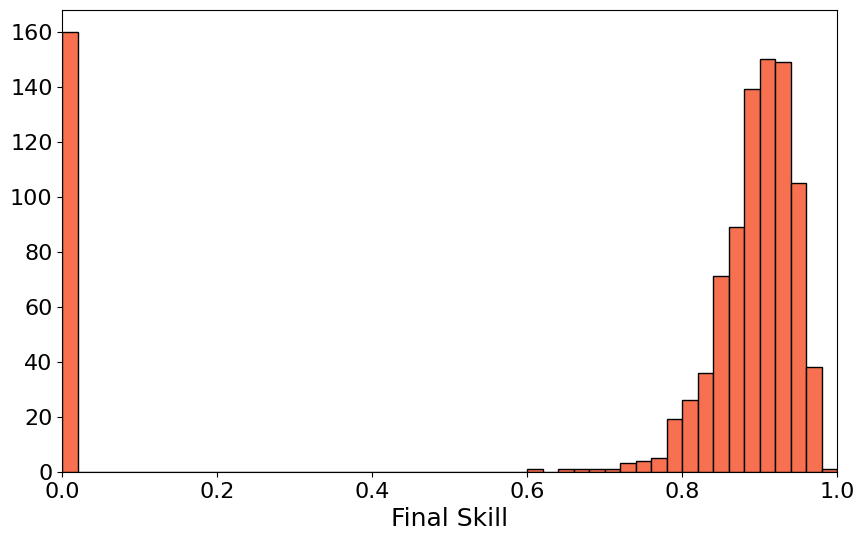

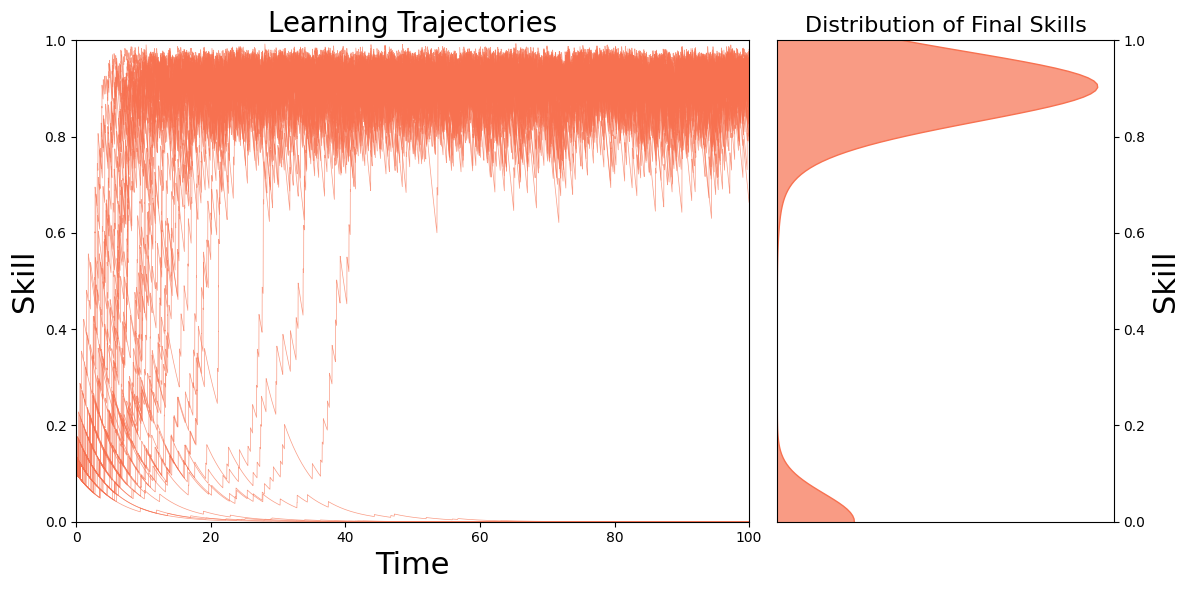

In [14]:
########## Sigmoid Simulation and Plots ##########

## Defining the learning, forgetting and practice functions:
log_learning = logistic_learning(alpha=0.4) # alpha is the learning rate
simple_prac_func = simple_linear_rate(a=0.2, b=5) # sample practice function
exp_forgetting = exponential_forgetting(forgetting_rate=0.2) # setting forgetting function to exponential 
spacing = spacing_effect(beta_min=0.1, e=0.01, s=0.5)


# initializing the class
sigmoid_spacing_sims = RPS_Basic_Multirun(learning_func=log_learning,
                            forgetting_func=exp_forgetting,
                            practice_rate_func=simple_prac_func,
                            waiting_time_dist=exponential_waiting_time,
                            spacing_func = spacing,
                            initial_skill = 0.1, 
                            initial_practice_rate = 1, 
                            max_time = 100,
                            n_sims=1000)
# running the simulations
sigmoid_spacing_sims.run_multiple_sims() 

#concave_colour = '#466be8'

# plot final skill histogram:
sigmoid_spacing_sims.plot_final_skill_histogram(colour=sigmoid_colour)
 
# combined_plot of learning trajectories + histogram of final skills
#concave_sims.plot_trajectory_and_histogram(colour_lineplots=concave_colour, colour_histogram=concave_colour, n_plots=100)

# Better Plot:
# sigmoid_spacing_sims.plot_summary_cogsci(colour_lineplots=sigmoid_colour, colour_histogram=sigmoid_colour, n_plots=50, 
#    bw_adjust=0.7,save_location='../plots/sigmoid_spacing_sim_summ_cogsci.png')

sigmoid_spacing_sims.plot_summary_cogsci(colour_lineplots=sigmoid_colour, colour_histogram=sigmoid_colour, n_plots=50, bw_adjust=0.7)


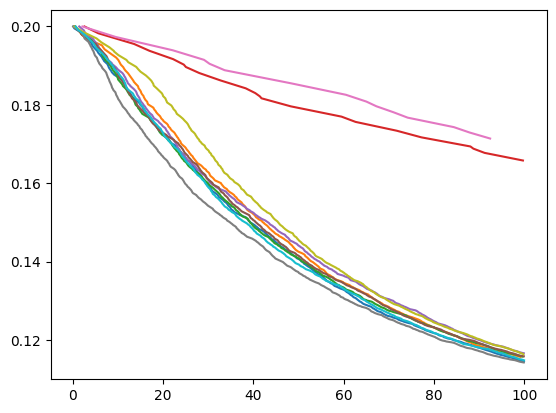

In [25]:
lol = sigmoid_spacing_sims.all_forgetting_rates
for i in range(10):
    plt.plot(sigmoid_spacing_sims.all_practice_times[i][1:-1], sigmoid_spacing_sims.all_forgetting_rates[i])
plt.show()